<a href="https://colab.research.google.com/github/Jamal-1018/Laptops_price_predicition_ML/blob/main/laptops_price_predicition_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries for mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# importig the dataset
import pandas as pd
import numpy as np

# libraries for charts
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# importing the dataset
url = '/content/drive/MyDrive/Datasets 22-23/laptops_cleaned.csv'
DATA =  pd.read_csv(url)
# creating a copy of data

df = DATA.copy()

In [4]:
# first look of dataset
df

,index,Company,TypeName,Inches,screen_width,screen_height,touchscreen,cpu_brand,cpu_name,cpu_speed,Ram,memory_type,primary_storage,secondary_storage,gpu_brand,OpSys,Weight,price
0,1,Apple,Ultrabook,13.3,2560,1600,0,Intel,Core i5,2.3,8,SSD,128,0,Intel,macOS,1,71379
1,2,Apple,Ultrabook,13.3,1440,900,0,Intel,Core i5,1.8,8,Flash storage,128,0,Intel,macOS,1,47896
2,3,HP,Notebook,15.6,1920,1080,0,Intel,i5 7200U,2.5,8,SSD,256,0,Intel,NaN,2,30636
3,4,Apple,Ultrabook,15.4,2880,1800,0,Intel,Core i7,2.7,16,SSD,512,0,AMD,macOS,2,135195
4,5,Apple,Ultrabook,13.3,2560,1600,0,Intel,Core i5,3.1,8,SSD,256,0,Intel,macOS,1,96096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,1299,Lenovo,2 in 1 Convertible,14.0,1920,1080,1,Intel,i7 6500U,2.5,4,SSD,128,0,Intel,windows,2,33993
1268,1300,Lenovo,2 in 1 Convertible,13.3,3200,1800,1,Intel,i7 6500U,2.5,16,SSD,512,0,Intel,windows,1,79867
1269,1301,Lenovo,Notebook,14.0,1366,768,0,Intel,Core N3050,1.6,2,Flash storage,64,0,Intel,windows,2,12201
1270,1302,HP,Notebook,15.6,1366,768,0,Intel,i7 6500U,2.5,6,HDD,1024,0,AMD,windows,2,40706


In [5]:
# Shape of the dataset
print(f"The number of rows : {df.shape[0]}")
print(f"The number of columns : {df.shape[1]}")

The number of rows : 1272
The number of columns : 18


In [6]:
# info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              1272 non-null   int64  
 1   Company            1272 non-null   object 
 2   TypeName           1272 non-null   object 
 3   Inches             1272 non-null   float64
 4   screen_width       1272 non-null   int64  
 5   screen_height      1272 non-null   int64  
 6   touchscreen        1272 non-null   int64  
 7   cpu_brand          1272 non-null   object 
 8   cpu_name           1272 non-null   object 
 9   cpu_speed          1272 non-null   float64
 10  Ram                1272 non-null   int64  
 11  memory_type        1271 non-null   object 
 12  primary_storage    1272 non-null   int64  
 13  secondary_storage  1272 non-null   int64  
 14  gpu_brand          1272 non-null   object 
 15  OpSys              1209 non-null   object 
 16  Weight             1272 

In [7]:
# description of the data
df.describe()

,index,Inches,screen_width,screen_height,touchscreen,cpu_speed,Ram,primary_storage,secondary_storage,Weight,price
count,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000
mean,653.813679,15.130818,1894.199686,1070.531447,0.145440,2.298522,8.463050,448.059748,173.264151,2.023585,59902.143082
std,376.608478,1.954436,494.389426,284.512222,0.352683,0.507123,5.566582,366.788872,413.745616,0.872381,37297.683852
min,1.000000,10.100000,1366.000000,768.000000,0.000000,0.900000,1.000000,0.000000,0.000000,0.000000,9271.000000
25%,327.750000,14.000000,1600.000000,900.000000,0.000000,2.000000,4.000000,256.000000,0.000000,2.000000,31915.000000
50%,653.500000,15.600000,1920.000000,1080.000000,0.000000,2.500000,8.000000,256.000000,0.000000,2.000000,52108.000000
75%,981.250000,15.600000,1920.000000,1080.000000,0.000000,2.700000,8.000000,512.000000,0.000000,2.000000,79244.500000
max,1303.000000,35.600000,3840.000000,2160.000000,1.000000,3.600000,64.000000,2048.000000,2048.000000,11.000000,324955.000000


In [25]:
# count of unique values in each variable
df.nunique()

company               19
typename               6
inches                24
screen_width          13
screen_height         10
touchscreen            2
cpu_brand              3
cpu_name              91
cpu_speed             25
ram                   10
memory_type            4
primary_storage       14
secondary_storage      6
gpu_brand              4
opsys                  4
weight                10
price                764
dtype: int64

In [8]:
for col in df.columns:
  print(df[col].value_counts())
  print("-"*40)

index
1       1
869     1
876     1
875     1
874     1
       ..
435     1
434     1
433     1
432     1
1303    1
Name: count, Length: 1272, dtype: int64
----------------------------------------
Company
Lenovo       290
Dell         286
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
LG             3
Huawei         2
Fujitsu        2
Name: count, dtype: int64
----------------------------------------
TypeName
Notebook              710
Gaming                203
Ultrabook             191
2 in 1 Convertible    116
Workstation            28
Netbook                24
Name: count, dtype: int64
----------------------------------------
Inches
15.6    640
14.0    192
17.3    162
13.3    161
12.5     38
11.6     31
12.0      6
13.9      6
13.5      5
12.3      5
15.4      4
15.0      4
35.6      3
10.1      

In [9]:
df.columns

Index(['index', 'Company', 'TypeName', 'Inches', 'screen_width',
       'screen_height', 'touchscreen', 'cpu_brand', 'cpu_name', 'cpu_speed',
       'Ram', 'memory_type', 'primary_storage', 'secondary_storage',
       'gpu_brand', 'OpSys', 'Weight', 'price'],
      dtype='object')

In [10]:
# Renaming the columns
df.rename(columns = {"Company":"company","TypeName": "typename", "Inches":"inches","Ram":"ram","OpSys": "opsys", "Weight":"weight"}, inplace = True)

In [12]:
# Dropping the index variable
df.drop(columns = 'index', inplace = True)

In [13]:
# Checking for the duplicate values
df.duplicated().sum()

31

In [14]:
# Checking for the null values
df.isnull().sum()

company               0
typename              0
inches                0
screen_width          0
screen_height         0
touchscreen           0
cpu_brand             0
cpu_name              0
cpu_speed             0
ram                   0
memory_type           1
primary_storage       0
secondary_storage     0
gpu_brand             0
opsys                63
weight                0
price                 0
dtype: int64

In [15]:
# Replacing the nan values in  "opsys" with 'others'
df['opsys'].fillna('others',inplace = True)

In [16]:
df.isnull().sum()

company              0
typename             0
inches               0
screen_width         0
screen_height        0
touchscreen          0
cpu_brand            0
cpu_name             0
cpu_speed            0
ram                  0
memory_type          1
primary_storage      0
secondary_storage    0
gpu_brand            0
opsys                0
weight               0
price                0
dtype: int64

#### Categorizing the variables

In [17]:
cont_var = df.describe().columns
cat_var  = [i for i in df.columns if i not in cont_var]
dep_var = 'price'

# Exploratory Data Analysis


## visualization of continuous varibales

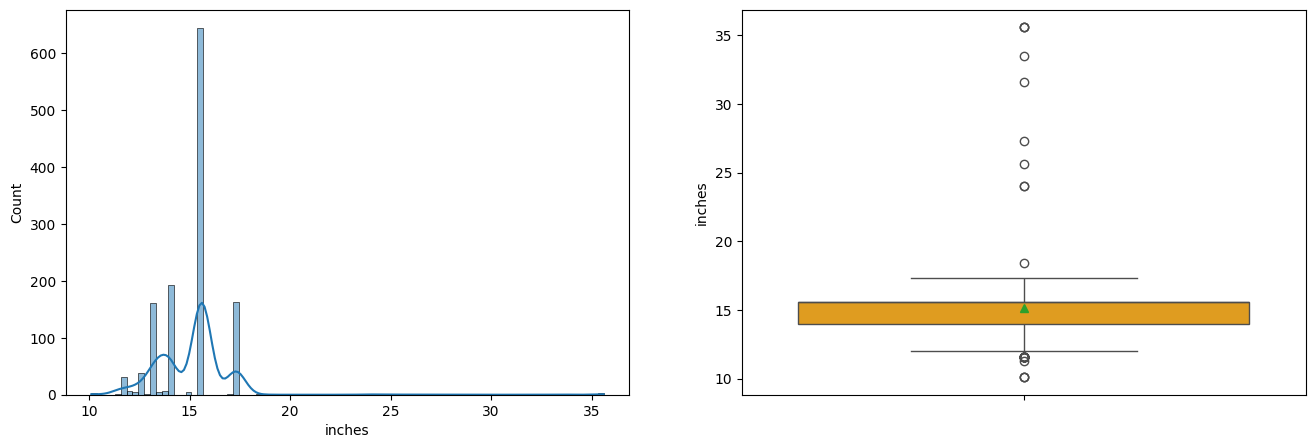

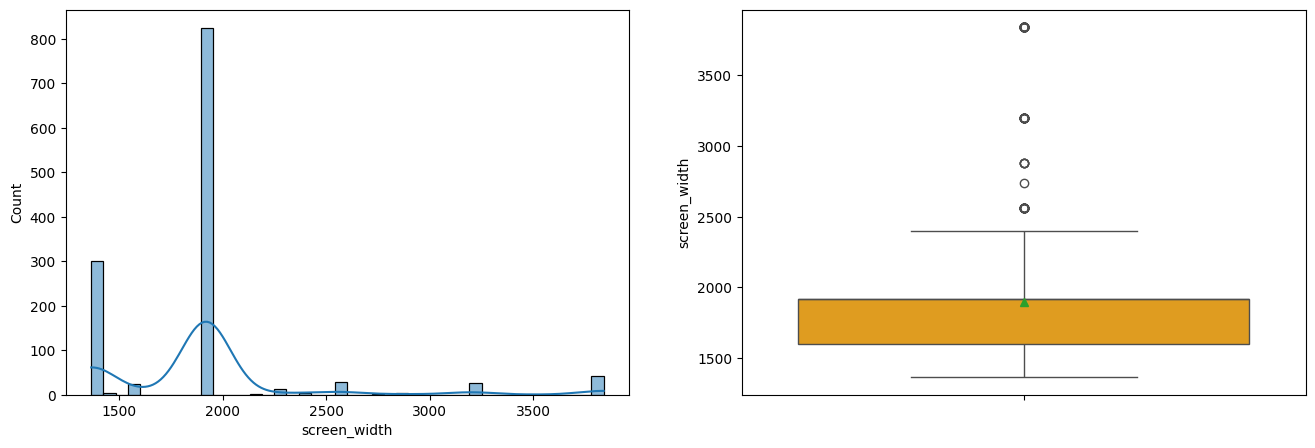

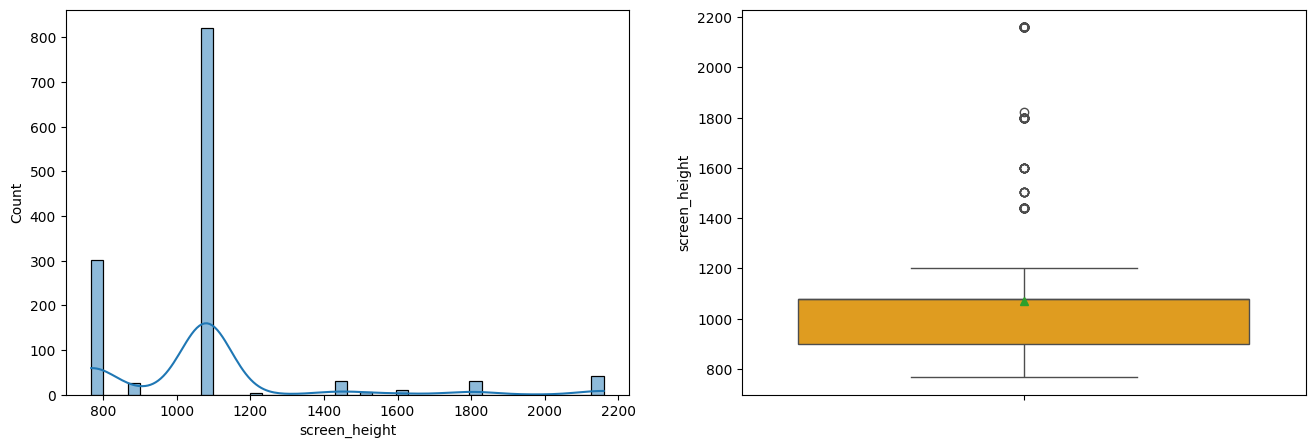

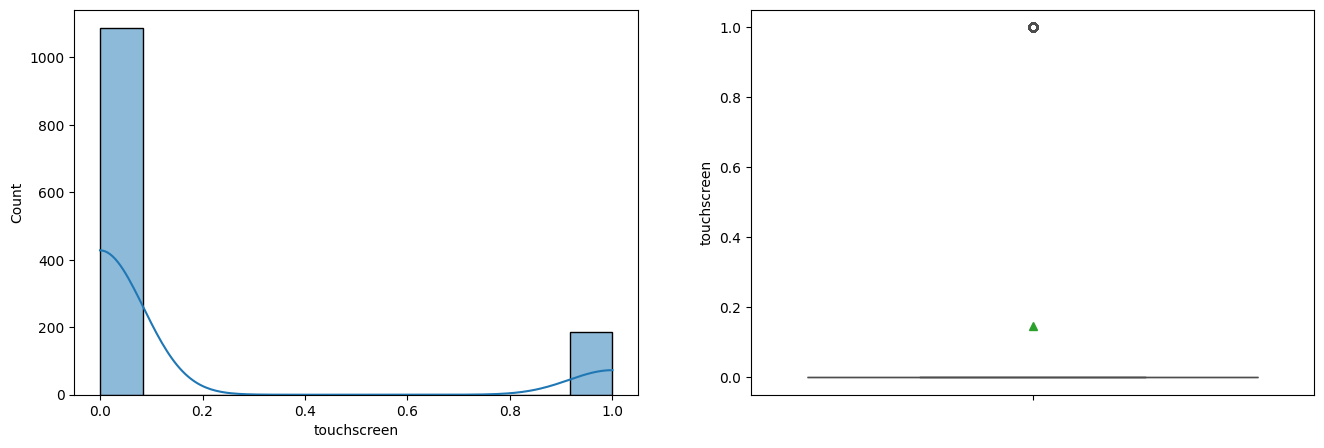

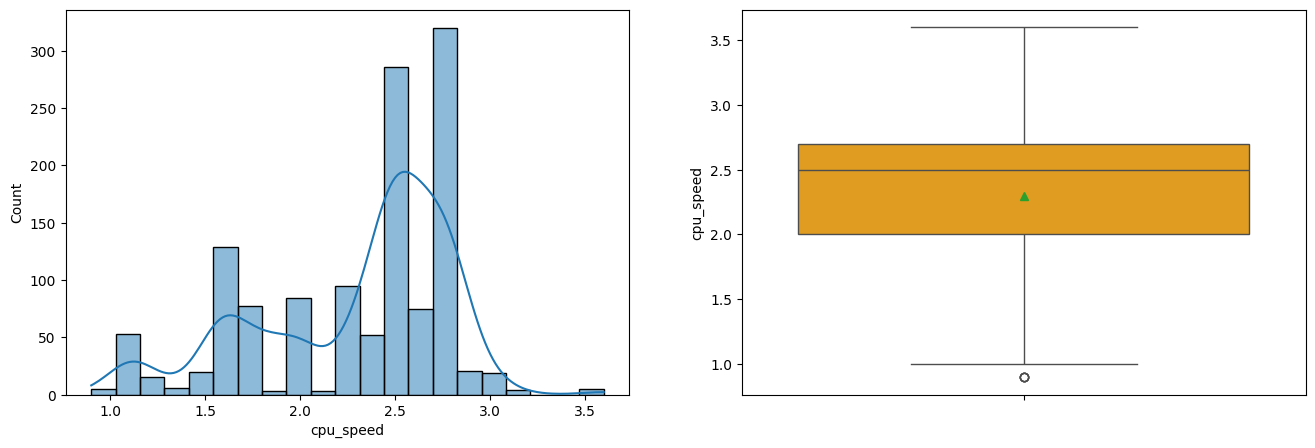

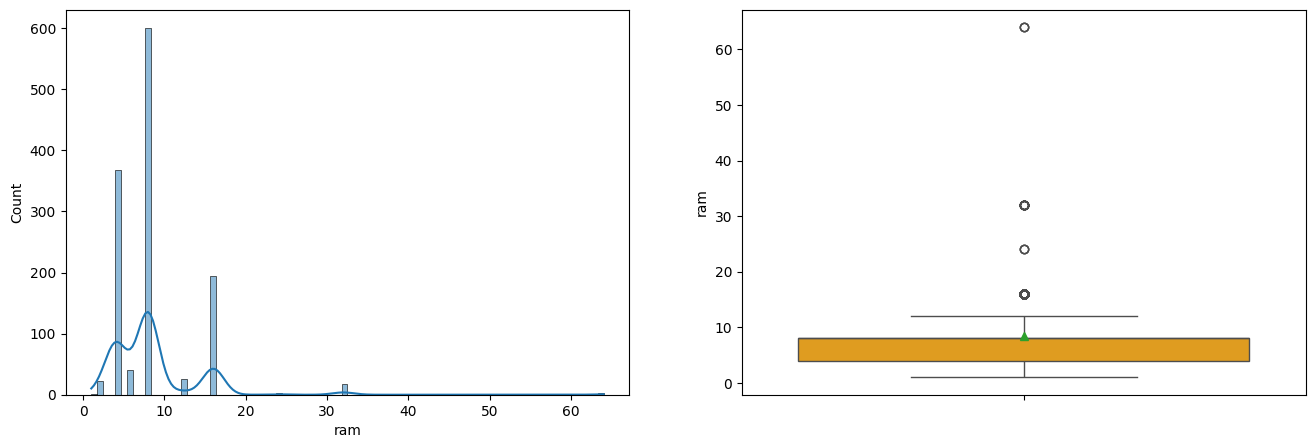

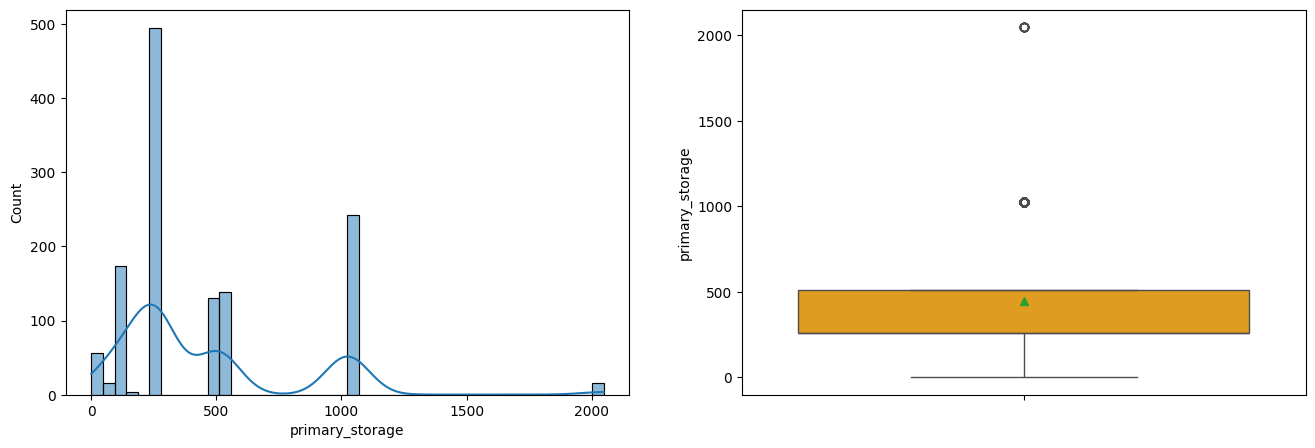

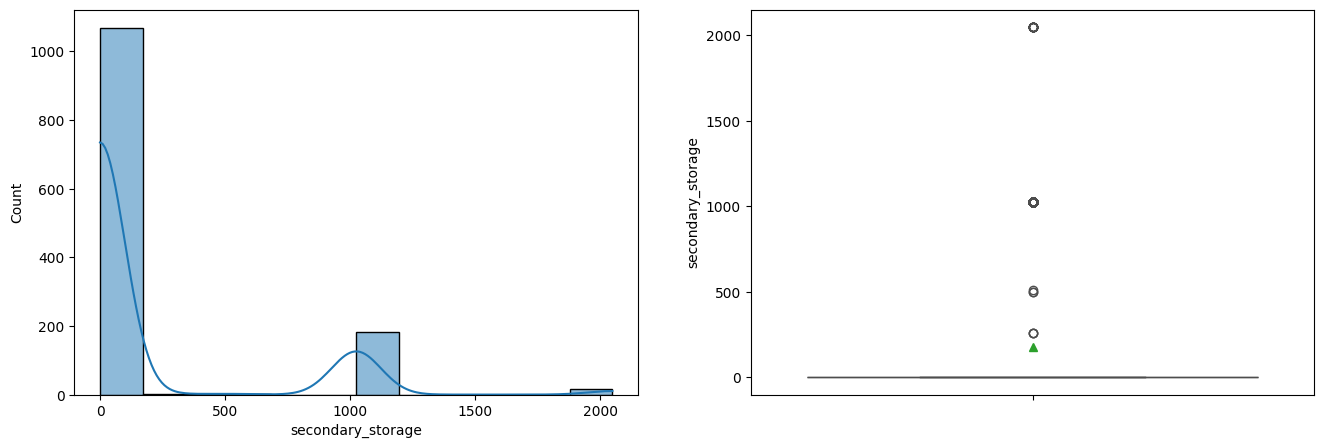

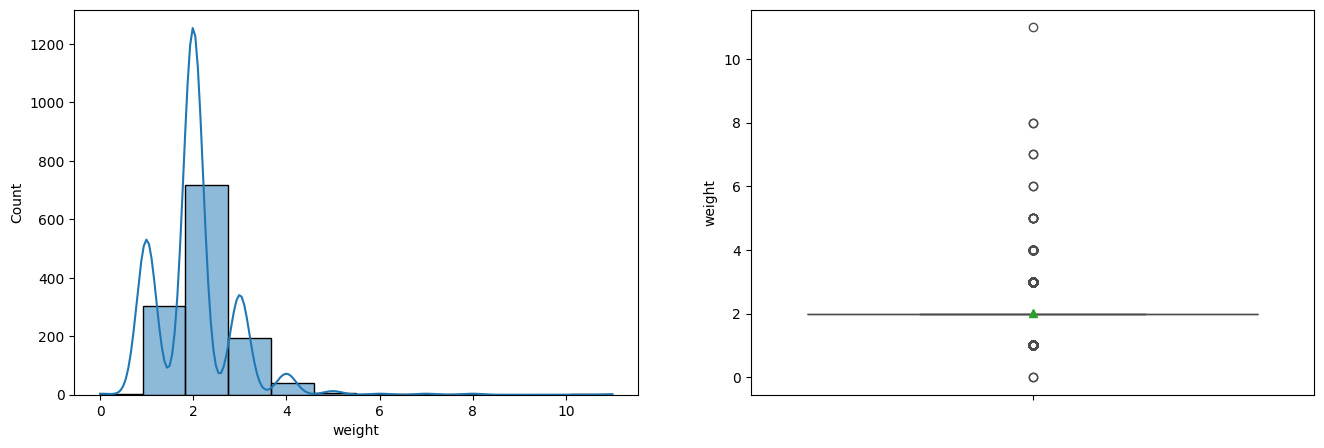

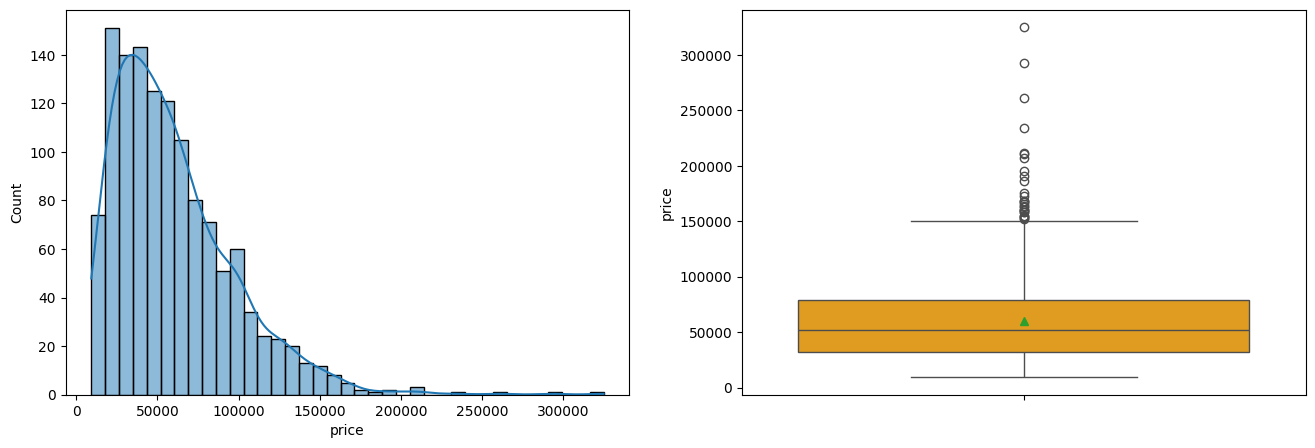

<Figure size 640x480 with 0 Axes>

In [18]:
# visualization on continous variables with histplot and boxplot
for col in df.describe().columns:
    fig, axes = plt.subplots(nrows = 1,ncols = 2, figsize = (16, 5))
    sns.histplot(df[col], ax = axes[0],kde = True)
    sns.boxplot(df[col], ax = axes[1],showmeans = True, color= 'orange')
plt.show()
plt.tight_layout()

From the above analysis, we got below insights:
 - The majority of screen sizes are occured at the value of 16

 - The majority of laptop touchscreen is `NO`

 - The ram value is at `8` following `4`
 - The mean value for the dependent variable is `50000`

## Visualization of categorical variables

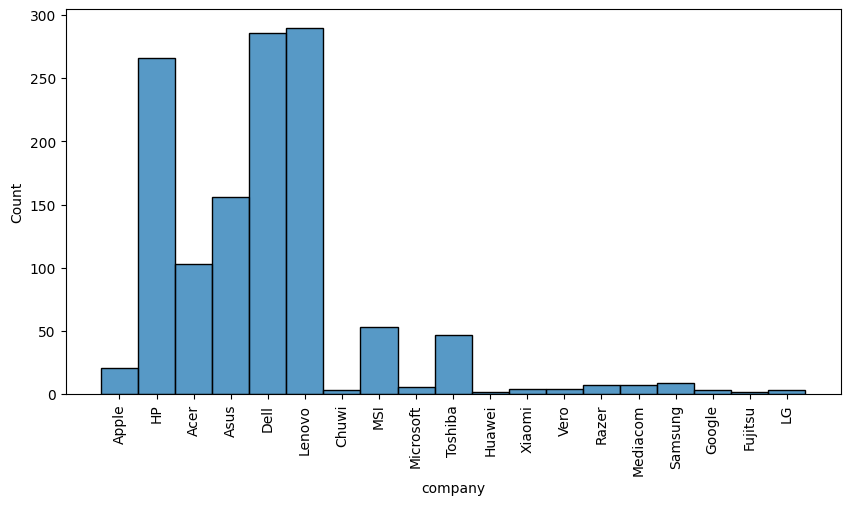

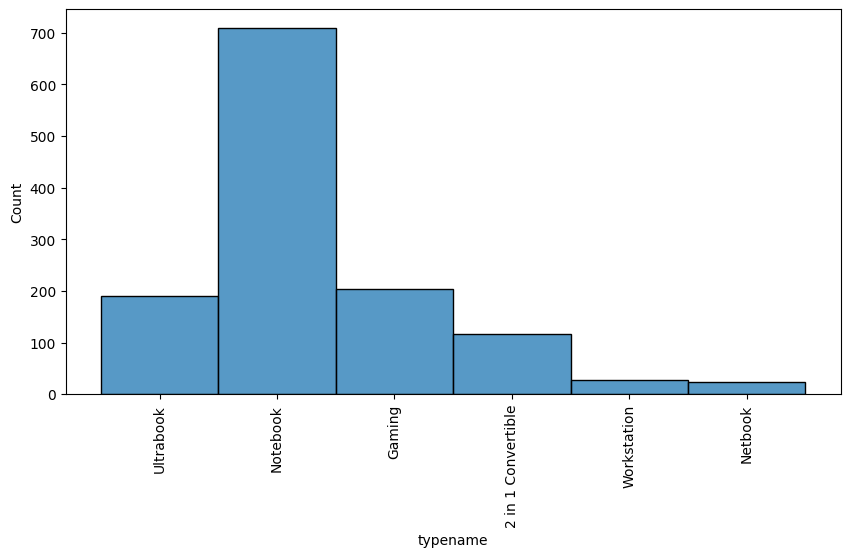

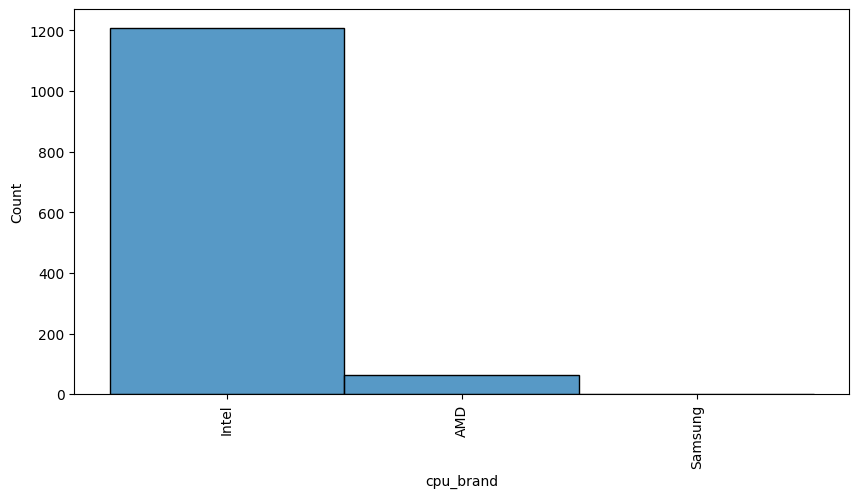

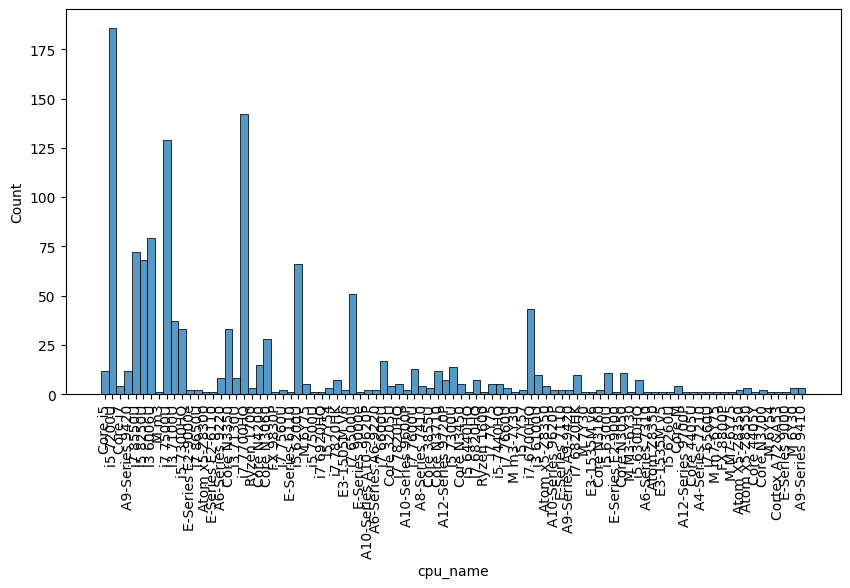

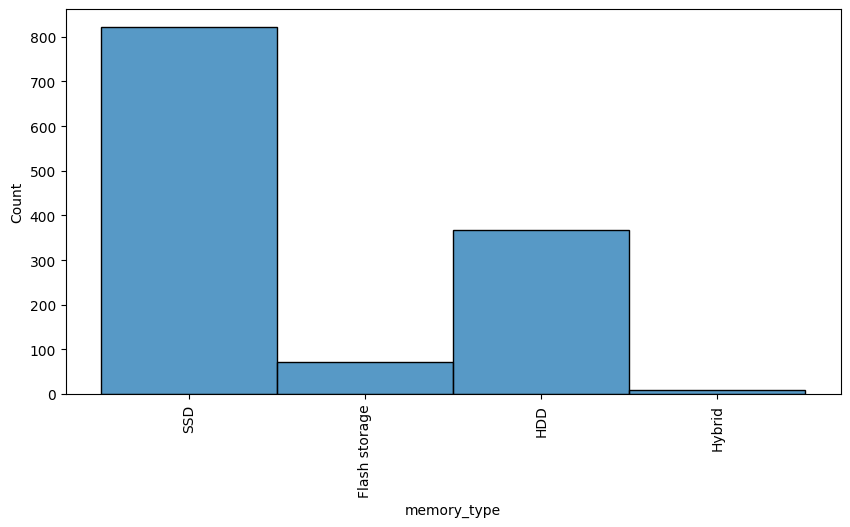

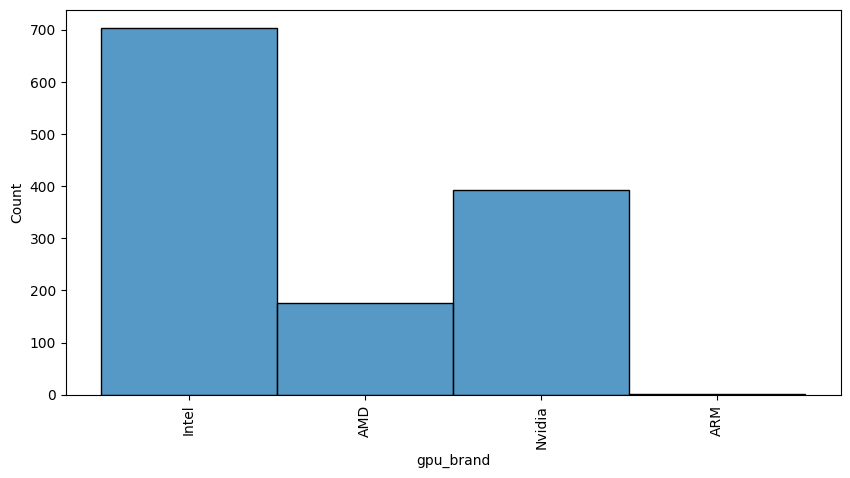

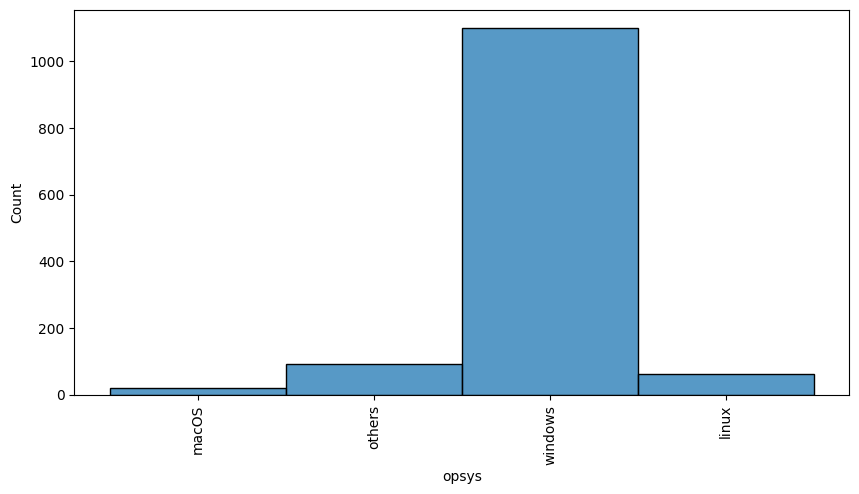

<Figure size 640x480 with 0 Axes>

In [19]:
# plotting the categorical columns
for col in df[cat_var]:
  plt.figure(figsize = (10,5))
  sns.histplot(df[col])
  plt.xticks(rotation = 'vertical')
plt.show()
plt.tight_layout()

From the above analysis, we got below insights:
- The most of the values belongs to `Lenovo`,`dell`, followed by `hp`.
- The majority of cpu name belongs to `i5 core` processor
- The majority of opsys values are `windows`

## Visualization of categorical variables with dependent variable

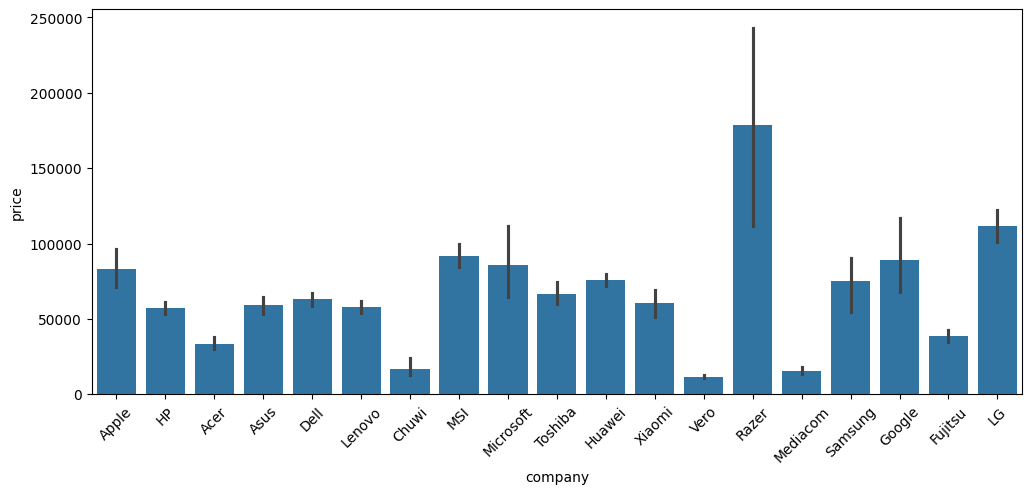

<Figure size 640x480 with 0 Axes>

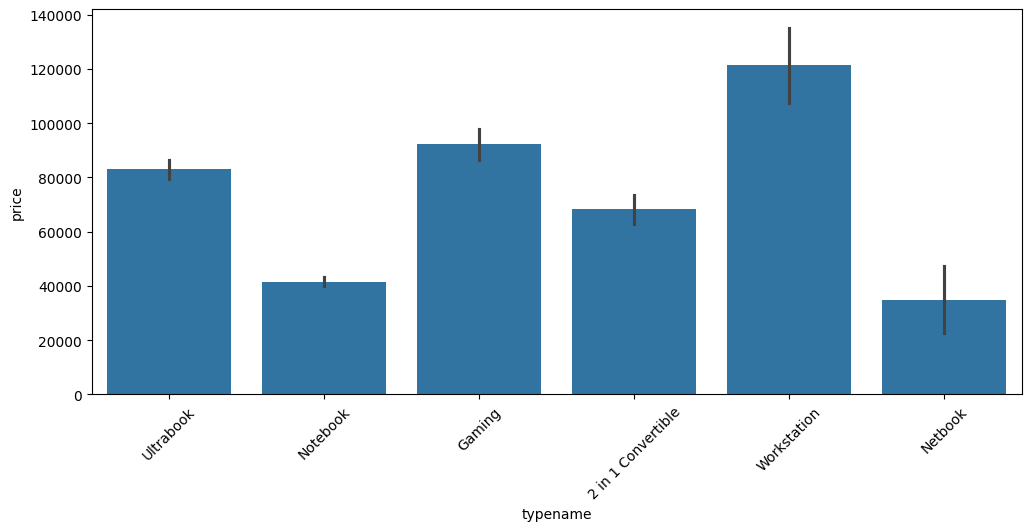

<Figure size 640x480 with 0 Axes>

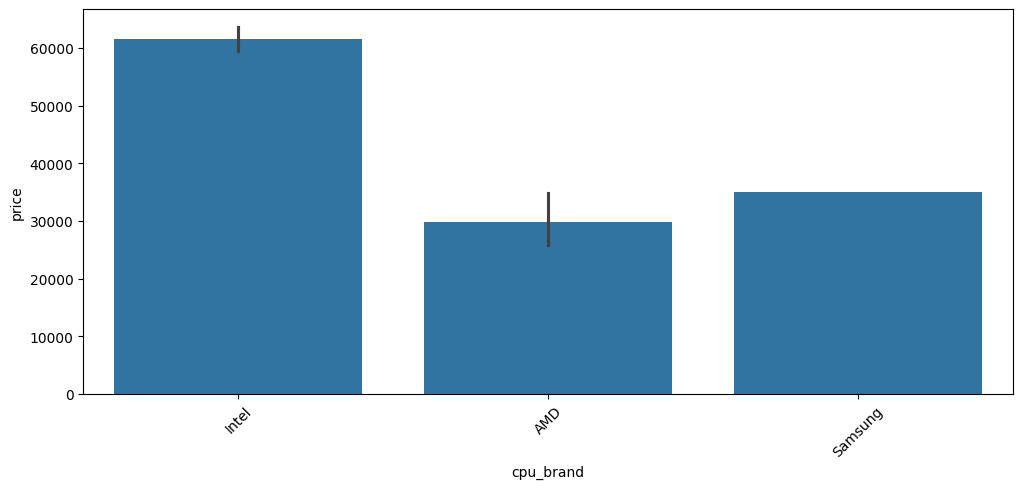

<Figure size 640x480 with 0 Axes>

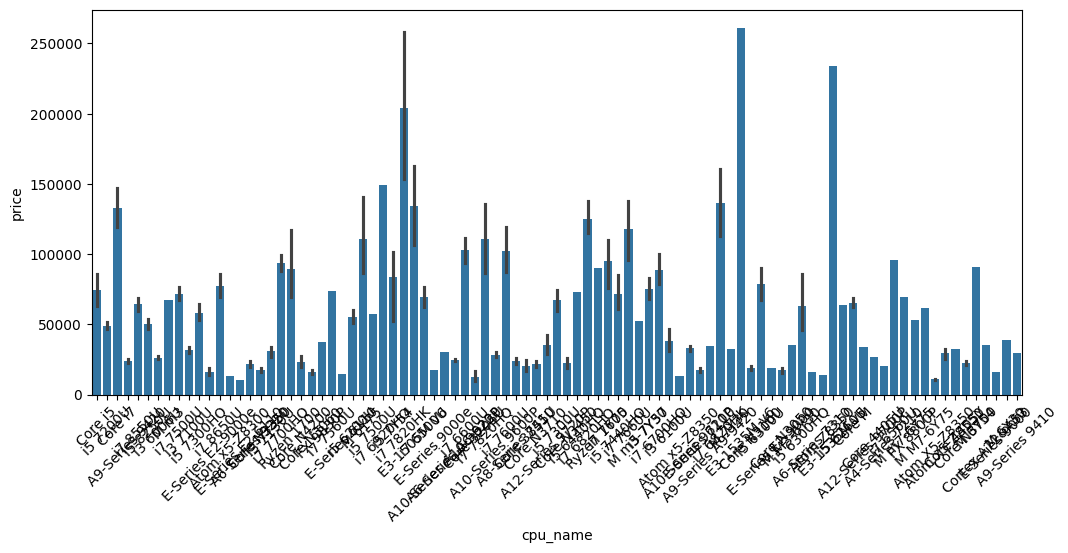

<Figure size 640x480 with 0 Axes>

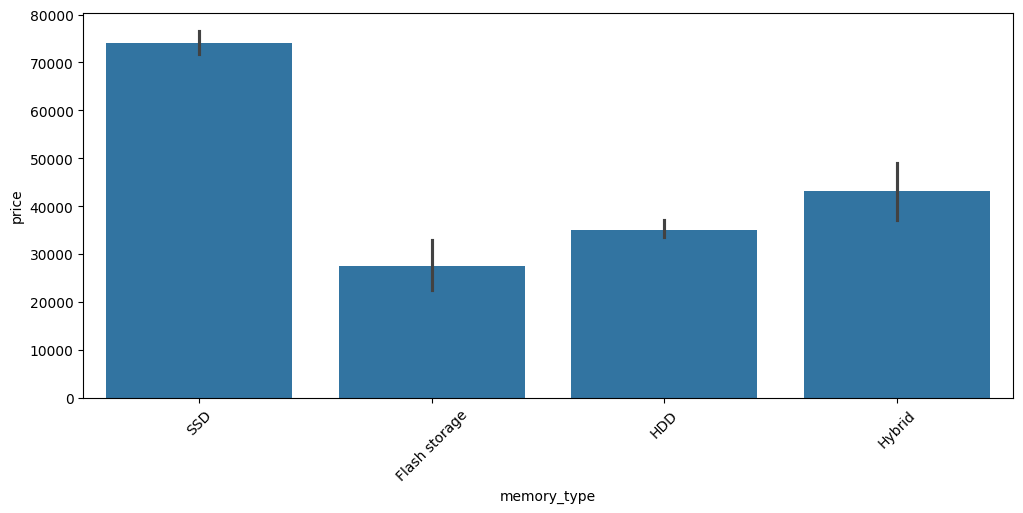

<Figure size 640x480 with 0 Axes>

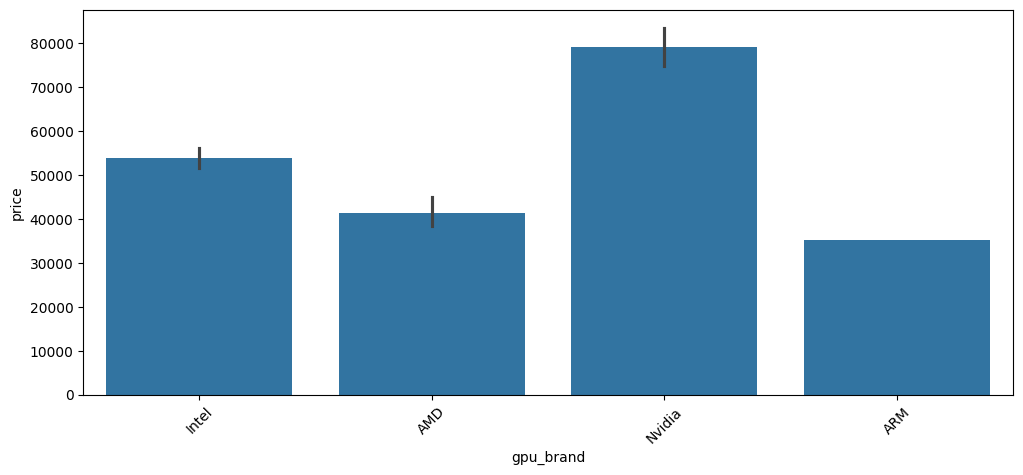

<Figure size 640x480 with 0 Axes>

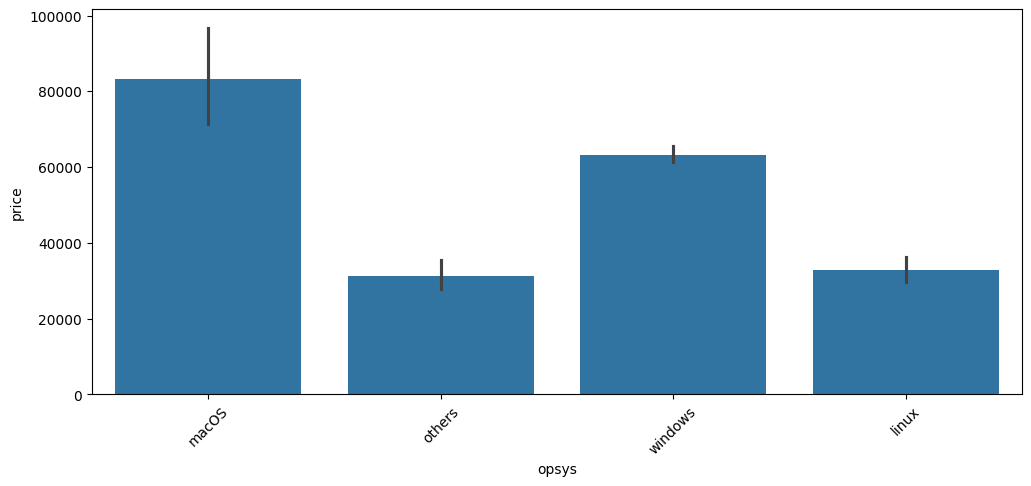

<Figure size 640x480 with 0 Axes>

In [20]:
# visualizaion of categorical variables with the dependent variable
for i, col in  enumerate(cat_var):
  plt.figure(figsize = (12,5))
  sns.barplot(x = df[col], y = df[dep_var])
  plt.xticks(rotation = 45)
  plt.show()
  plt.tight_layout()

## Visualization of continous variable with dependent variable

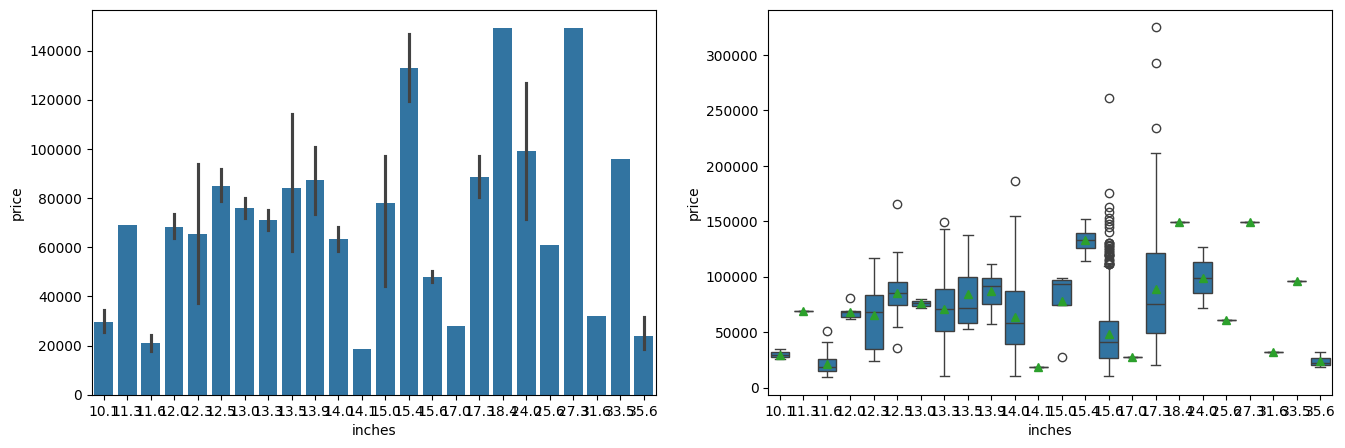

<Figure size 640x480 with 0 Axes>

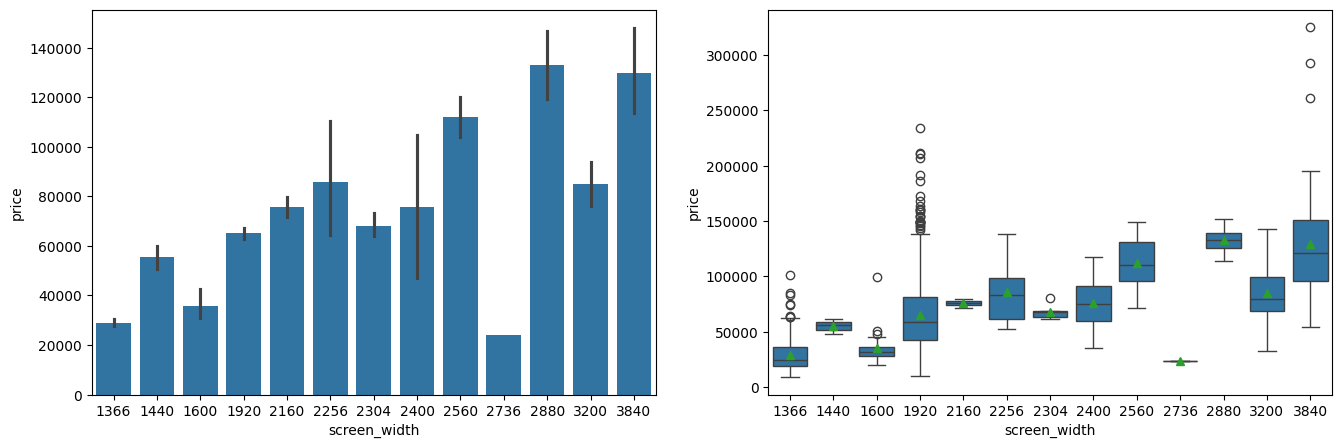

<Figure size 640x480 with 0 Axes>

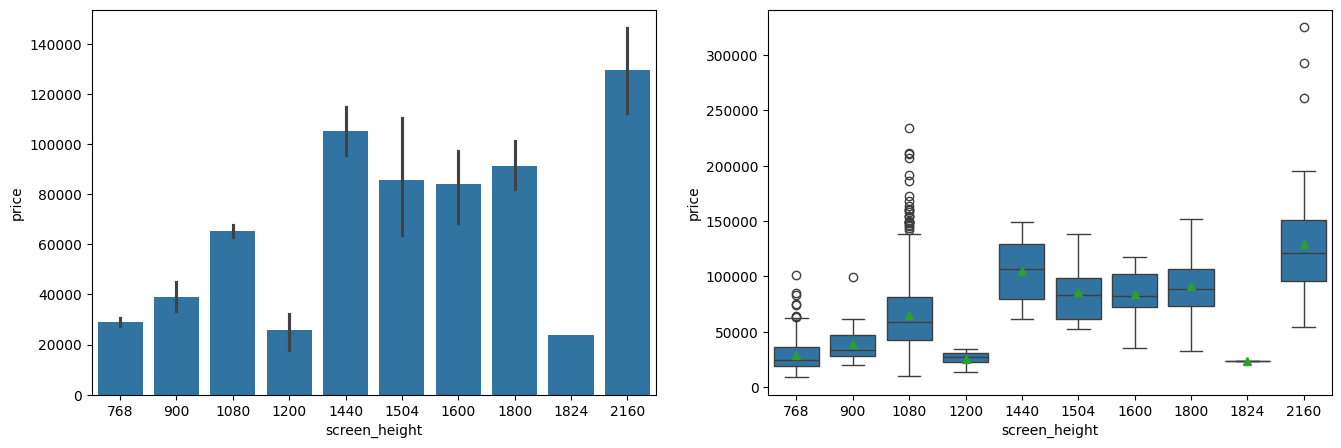

<Figure size 640x480 with 0 Axes>

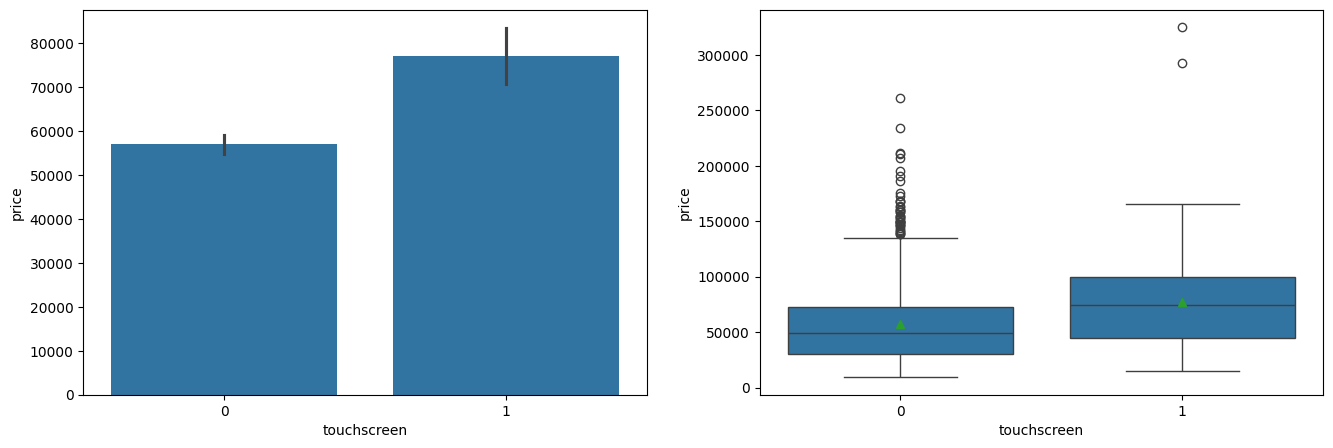

<Figure size 640x480 with 0 Axes>

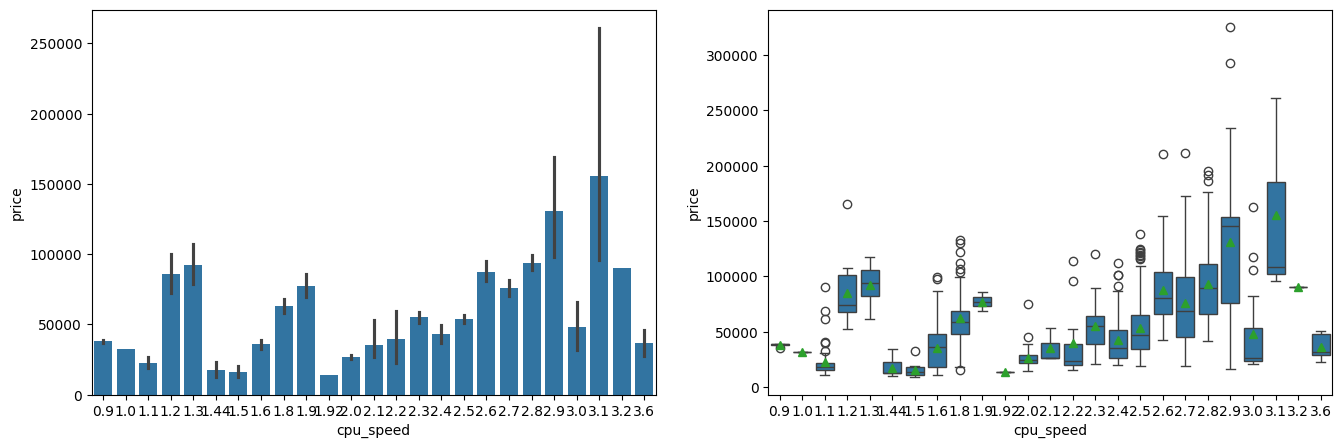

<Figure size 640x480 with 0 Axes>

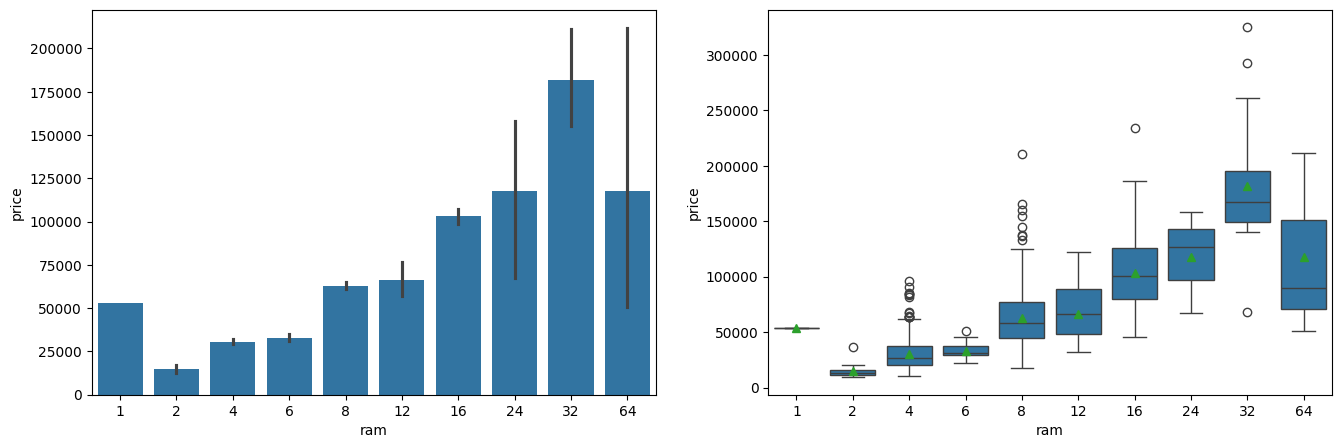

<Figure size 640x480 with 0 Axes>

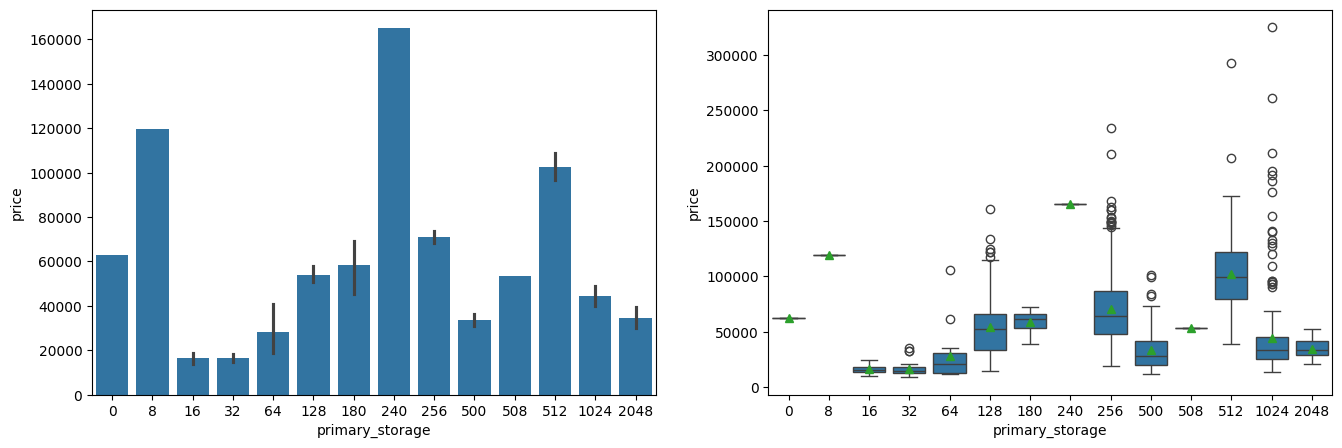

<Figure size 640x480 with 0 Axes>

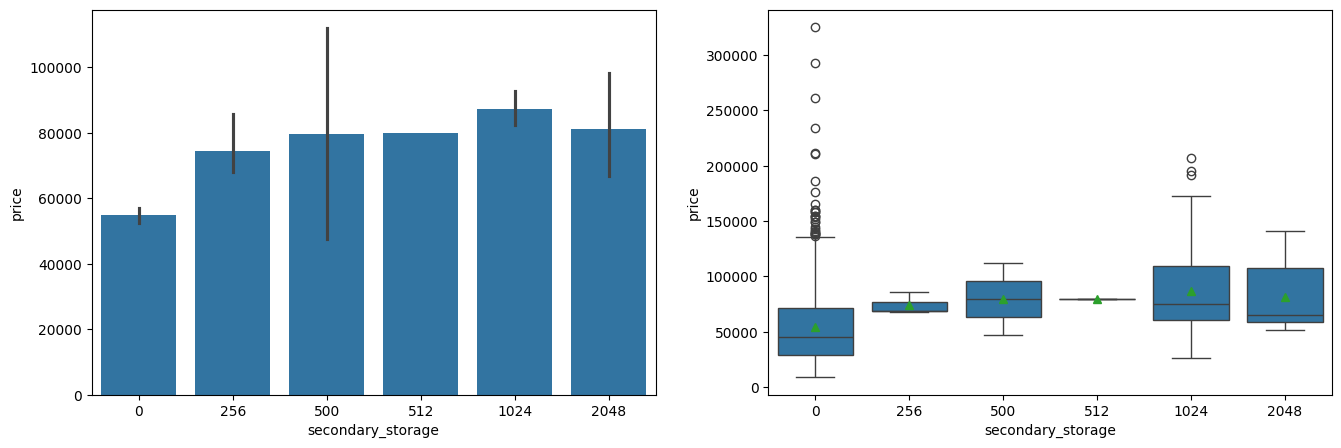

<Figure size 640x480 with 0 Axes>

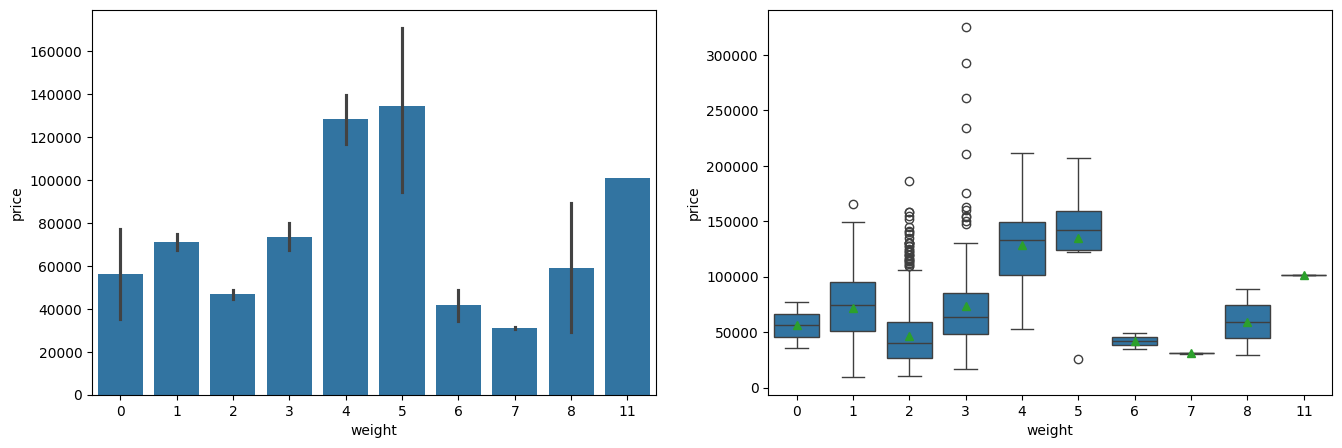

<Figure size 640x480 with 0 Axes>

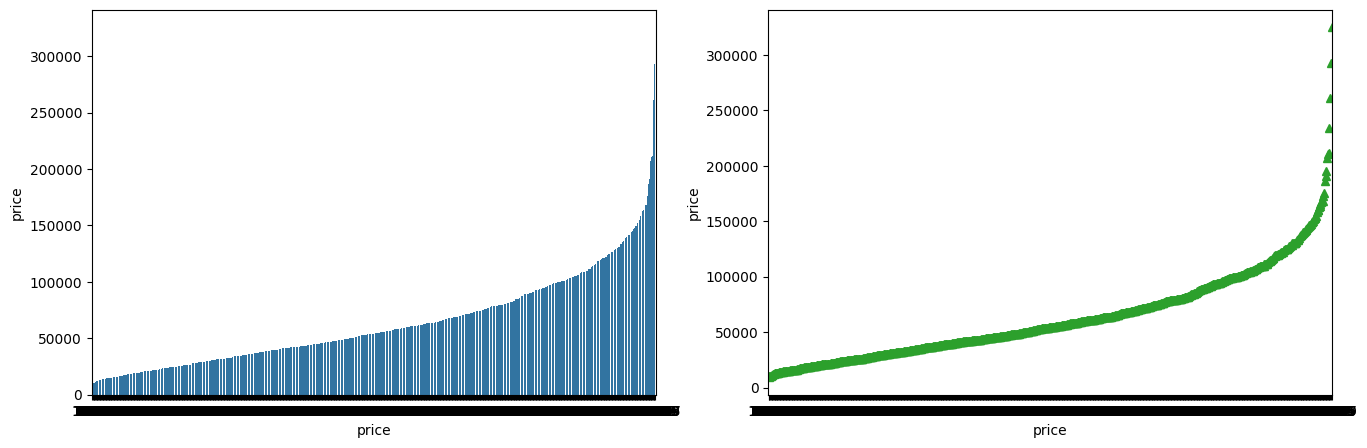

<Figure size 640x480 with 0 Axes>

In [38]:
# continuous variable with dependent variable
for i, col in enumerate(cont_var):
  fig, axes = plt.subplots(nrows = 1, ncols = 2,figsize = (16,5))
  sns.barplot(x = df[col], y  = df[dep_var], ax = axes[0])
  sns.boxplot(x = df[col], y = df[dep_var], ax = axes[1], showmeans = True)
  plt.show()
  plt.tight_layout()

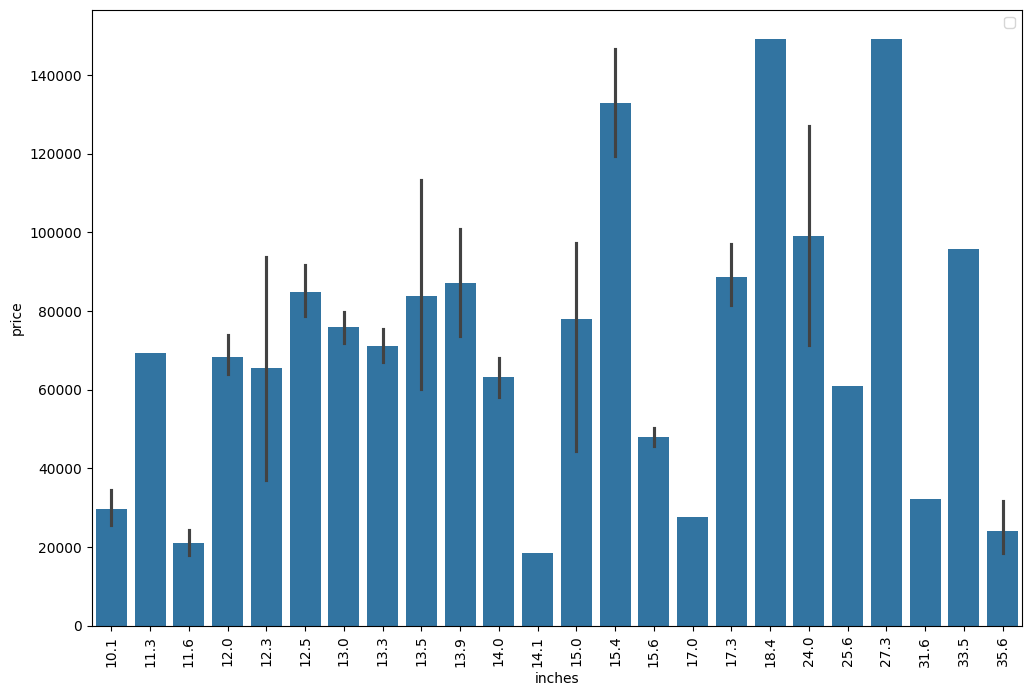

In [59]:
# visualization of inches with dependent variable
plt.figure(figsize = (12,8))
sns.barplot(x = df['inches'], y = df[dep_var])
plt.xticks(rotation = 'vertical')
plt.legend()
plt.show()

## Heat map

<Axes: >

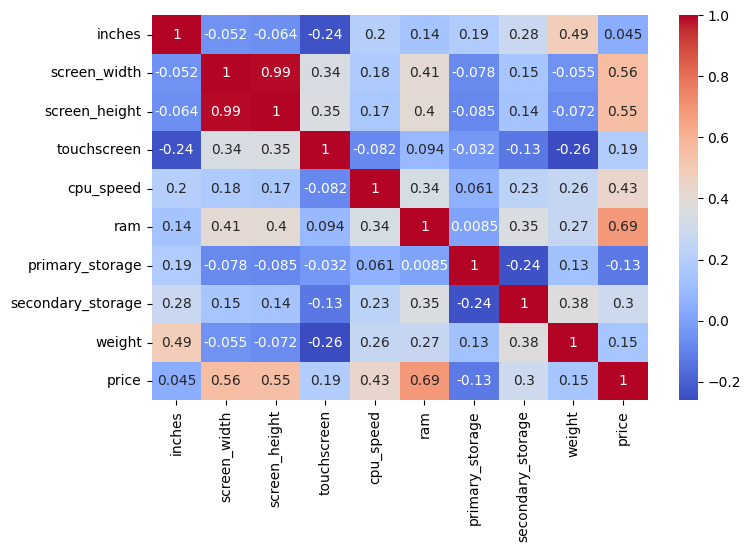

In [46]:
# visualization with heat map on continous variable
plt.figure(figsize = (8,5))
sns.heatmap(df[cont_var].corr(), annot = True, cmap = 'coolwarm')

In [50]:
#Dropping the variables
df.drop(columns = ['screen_height','screen_width'],axis = 0,inplace = True)

Dropping the `screen height` and `screen width` variables as the same information is available in `screen size` variable.

In [60]:
df.sample(6)

,company,typename,inches,touchscreen,cpu_brand,cpu_name,cpu_speed,ram,memory_type,primary_storage,secondary_storage,gpu_brand,opsys,weight,price
515,Dell,Notebook,15.6,0,Intel,i5 7200U,2.5,4,HDD,500,0,AMD,windows,2,31169
253,Lenovo,Notebook,15.6,0,Intel,i3 6006U,2.0,4,SSD,256,0,Intel,others,2,23656
213,Lenovo,2 in 1 Convertible,14.0,0,Intel,i5 8250U,1.6,8,SSD,256,0,Intel,windows,2,47899
1259,Dell,Notebook,15.6,0,Intel,i3 7100U,2.4,6,HDD,1024,0,Intel,windows,2,24456
28,HP,Notebook,17.3,0,Intel,i5 8250U,1.6,8,HDD,1024,0,Nvidia,windows,3,47739
302,Dell,Ultrabook,13.3,1,Intel,i7 8550U,1.8,16,SSD,1024,0,Intel,windows,1,133147
